
# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values 
and flip them on at a higher price. For the same purpose, the company has collected a data set 
from the sale of houses in Australia.  

The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularisation in order 
to predict the actual value of the prospective properties and decide whether to invest in them or not.
 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

    Determine the optimal value of lambda for ridge and lasso regression.
    

Business Goal: 
 

    The model the price of houses with the available independent variables. 
    This model will then be used by the management to understand how exactly the prices vary with the variables.
    They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
    The model will be a good way for management to understand the pricing dynamics of a new market.





 # Reading and Understanding the Data

In [51]:
#Importing all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing dataset

houseInfo = pd.read_csv('C:\\Users\\USER\\Downloads\\train.csv', encoding = 'latin')
houseInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Getting info of the file
houseInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Getting Shape of the file
houseInfo.shape

(1460, 81)

In [7]:
#Getting descibe
houseInfo.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#Getting Null value details
houseInfo.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


# Data Cleaning

#Removing/Imputing NaN values in Categorical attributes

In [11]:
# check for null values in all categorical columns

houseInfo.select_dtypes(include='object').isnull().sum()[houseInfo.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    houseInfo[col]=houseInfo[col].fillna('None')

#Remove categorical attributes that have more than 85% data associated to one value.
- We are removing the values that are repeating 1241 times which is 85%  in 1450 beacuse of the data skewness.

In [14]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = houseInfo.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(houseInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

houseInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

houseInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [15]:
# once again check for null values in all categorical columns

houseInfo.select_dtypes(include='object').isnull().sum()[houseInfo.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

Removing the Null values from Numerical Attributes

In [16]:
houseInfo.select_dtypes(include=('int64','float')).isnull().sum()[houseInfo.select_dtypes(include=('int64','float')).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [17]:
# Replace/Impute the Null vales with Median values for LotFrontage and MasVnrArea
houseInfo['LotFrontage'] = houseInfo['LotFrontage'].replace(np.nan, houseInfo['LotFrontage'].median())
houseInfo['MasVnrArea'] = houseInfo['MasVnrArea'].replace(np.nan, houseInfo['MasVnrArea'].median())

In [18]:
# Replacing the GarageYrBlt to 0 as we would use this field further.

houseInfo['GarageYrBlt'] = houseInfo['GarageYrBlt'].fillna(0)
houseInfo['GarageYrBlt'] = houseInfo['GarageYrBlt'].astype(int)

In [19]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
houseInfo['IsRemodell'] = houseInfo.apply(checkForRemodel, axis=1)
houseInfo.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodell
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [20]:


def getbuiltorremodelledage(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']

houseInfo['builtorremodelledage'] = houseInfo.apply(getbuiltorremodelledage, axis=1)
houseInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodell,builtorremodelledage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [21]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
houseInfo['OldOrNewGarage'] = houseInfo['GarageYrBlt'].apply(getGarageConstructionPeriod)
houseInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodell,builtorremodelledage,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [23]:
# we have created new fields from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt,so we can drop these columns as we 
# will use only be using the derived columns going forward

houseInfo.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#Remove numerical attributes that have more than 85% data associated to one value.

We are removing the values that are repeating 1241 times which is 85% in 1450 beacuse of the data skewness.

In [24]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighNumericalValueCounts():
    column = []
    numerical_columns = houseInfo.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(houseInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
houseInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

# Remove the column MoSold as we are not using further

houseInfo.drop(['MoSold'], axis = 1, inplace = True)

houseInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodell,builtorremodelledage,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [25]:
# check for percentage of null values in each column

percent_missing = round(100*(houseInfo.isnull().sum()/len(houseInfo.index)), 2)
print(percent_missing)

Id                      0.0
MSSubClass              0.0
MSZoning                0.0
LotFrontage             0.0
LotArea                 0.0
LotShape                0.0
LotConfig               0.0
Neighborhood            0.0
BldgType                0.0
HouseStyle              0.0
OverallQual             0.0
OverallCond             0.0
RoofStyle               0.0
Exterior1st             0.0
Exterior2nd             0.0
MasVnrType              0.0
MasVnrArea              0.0
ExterQual               0.0
Foundation              0.0
BsmtQual                0.0
BsmtExposure            0.0
BsmtFinType1            0.0
BsmtFinSF1              0.0
BsmtUnfSF               0.0
TotalBsmtSF             0.0
HeatingQC               0.0
1stFlrSF                0.0
2ndFlrSF                0.0
GrLivArea               0.0
BsmtFullBath            0.0
FullBath                0.0
HalfBath                0.0
BedroomAbvGr            0.0
KitchenQual             0.0
TotRmsAbvGrd            0.0
Fireplaces          

#Duplicate Checks

In [26]:
# Check if there are any duplicate values in the dataset

houseInfo[houseInfo.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodell,builtorremodelledage,OldOrNewGarage


#Outliers Check

In [27]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

houseInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodell,builtorremodelledage,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


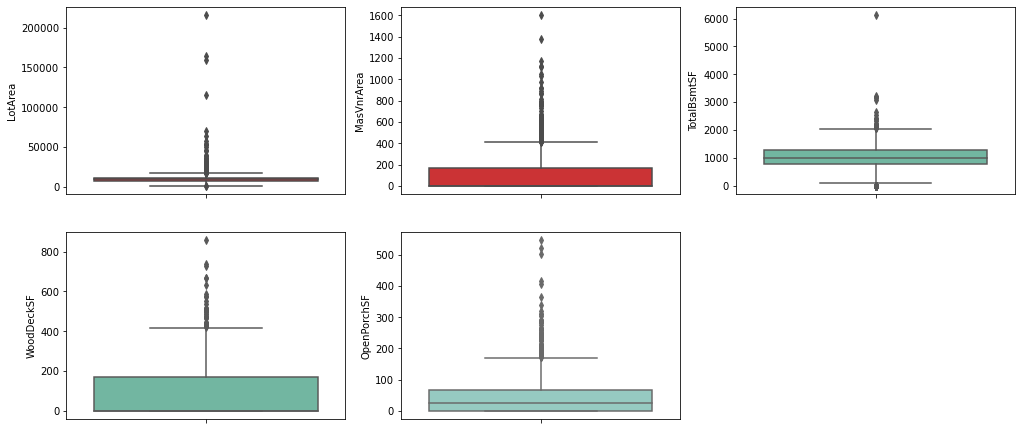

In [30]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set1', data = houseInfo)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set1', data = houseInfo)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set2', data = houseInfo)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set2', data = houseInfo)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = houseInfo)
plt.show()

In [31]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = houseInfo['LotArea'].quantile(0.98)
houseInfo = houseInfo[houseInfo["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = houseInfo['MasVnrArea'].quantile(0.98)
houseInfo = houseInfo[houseInfo["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = houseInfo['TotalBsmtSF'].quantile(0.99)
houseInfo = houseInfo[houseInfo["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = houseInfo['WoodDeckSF'].quantile(0.99)
houseInfo = houseInfo[houseInfo["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = houseInfo['OpenPorchSF'].quantile(0.99)
houseInfo = houseInfo[houseInfo["OpenPorchSF"] < nn_quartile_OpenPorchSF]

# Data Visualization

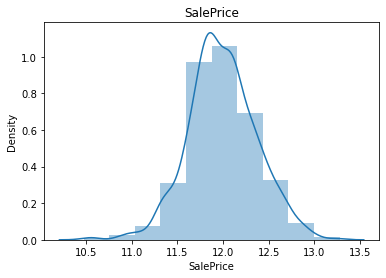

In [32]:
# Visualising SalePrice after transformation 

houseInfo['SalePrice'] = np.log1p(houseInfo['SalePrice'])

plt.title('SalePrice')
sns.distplot(houseInfo['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with some noise.

<Figure size 720x360 with 0 Axes>

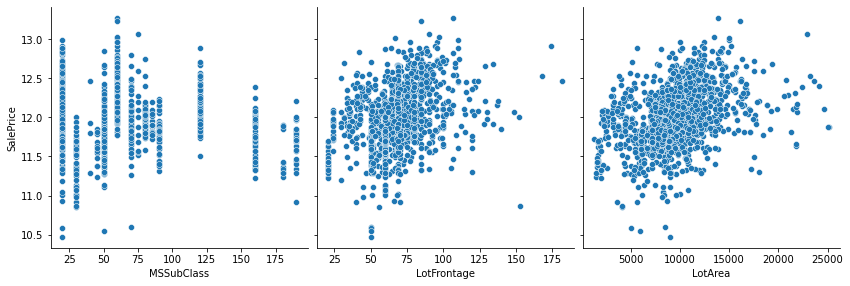

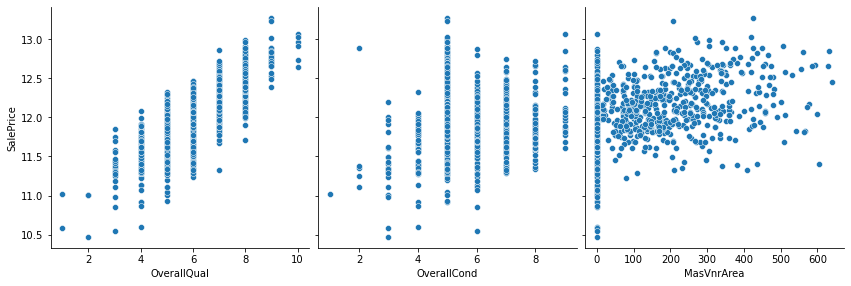

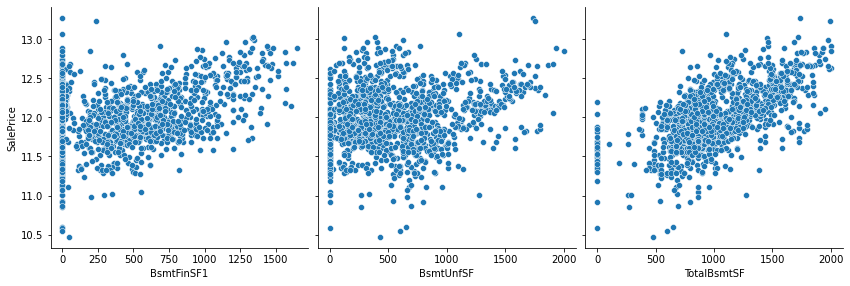

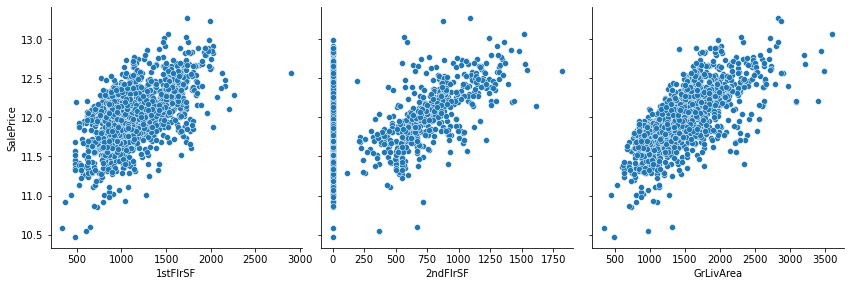

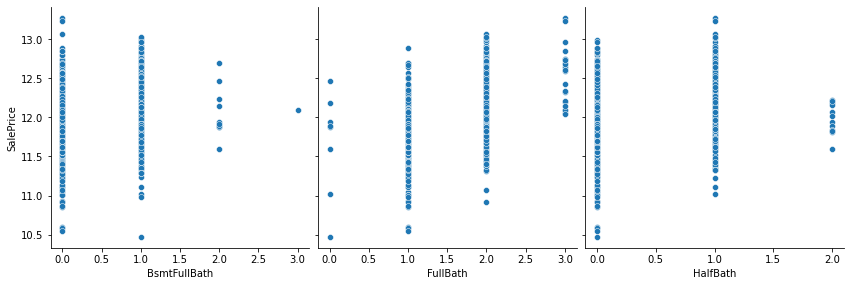

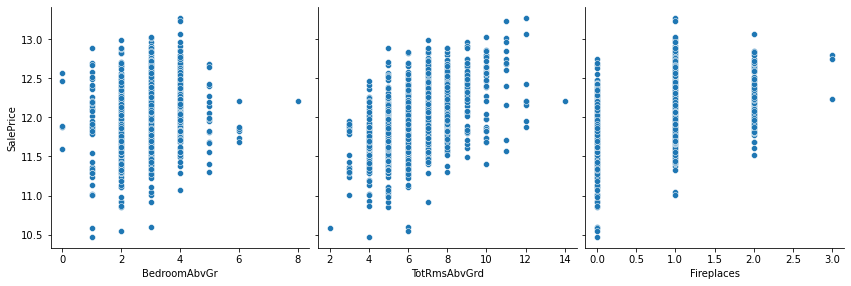

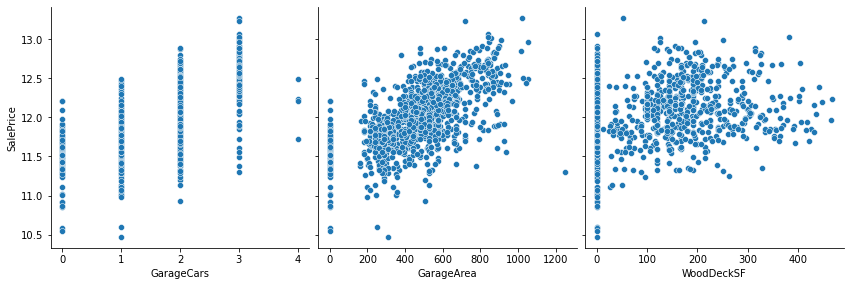

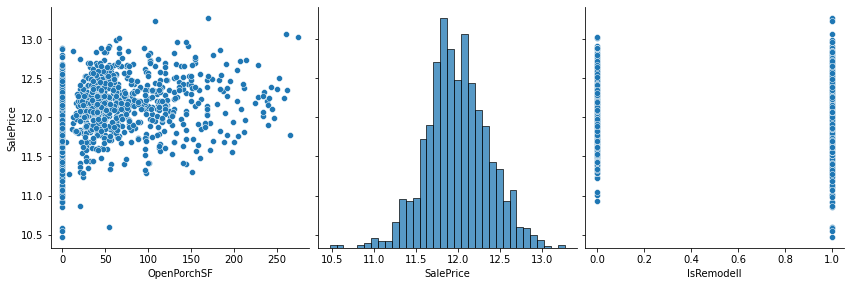

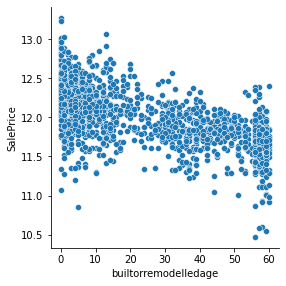

In [35]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(houseInfo, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseInfo, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseInfo, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseInfo, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseInfo, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseInfo, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseInfo, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseInfo, x_vars=['OpenPorchSF','SalePrice', 'IsRemodell'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseInfo, x_vars=['builtorremodelledage'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Observations :

- 1stFlrSF, GrLivArea and GarageArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis

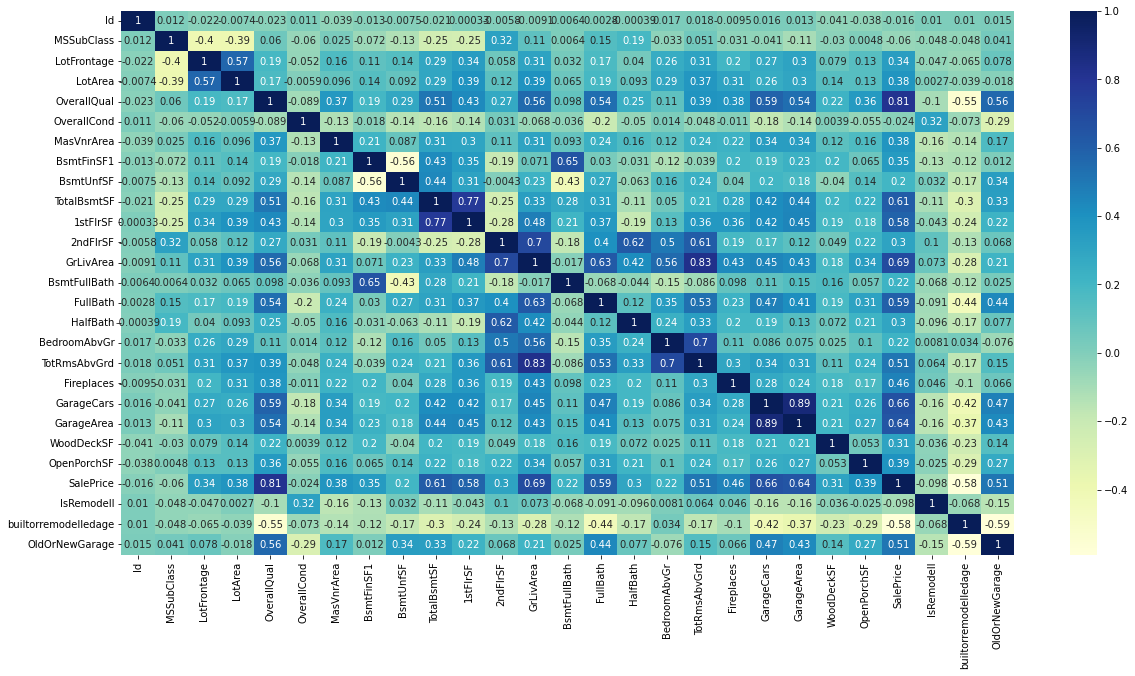

In [39]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(houseInfo.corr(), annot = True, cmap="YlGnBu")
plt.show()

Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

Hence dropping TotRmsAbvGrd and Garage Cars

In [40]:
# Removing the highly correlated variables

houseInfo.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

# Data Preparation

Converting categorical data into numercal data and Creating Dummies


In [41]:
# The values of the ordered list, we shall assign values 

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

houseInfo['d_LotShape'] = houseInfo['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
houseInfo['d_ExterQual'] = houseInfo['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
houseInfo['d_BsmtQual'] = houseInfo['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houseInfo['d_BsmtExposure'] = houseInfo['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
houseInfo['d_BsmtFinType1'] = houseInfo['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
houseInfo['d_HeatingQC'] = houseInfo['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houseInfo['d_KitchenQual'] = houseInfo['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houseInfo['d_FireplaceQu'] = houseInfo['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houseInfo['d_GarageFinish'] = houseInfo['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
houseInfo['d_BldgType'] = houseInfo['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
houseInfo['d_HouseStyle'] = houseInfo['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
houseInfo['d_Fence'] = houseInfo['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
houseInfo['d_LotConfig'] = houseInfo['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
houseInfo['d_MasVnrType'] = houseInfo['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
houseInfo['d_SaleCondition'] = houseInfo['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
houseInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [42]:
# dropping the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

houseInfo = houseInfo.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

houseInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [44]:
# For the following columns create dummies

# Creating dummies for following fields 

# MSZoning

der_MSZoning = pd.get_dummies(houseInfo['MSZoning'], prefix='MSZoning', drop_first = True)
houseInfo = pd.concat([houseInfo, der_MSZoning], axis = 1)

# Neighborhood

der_Neighborhood = pd.get_dummies(houseInfo['Neighborhood'], prefix='Neighborhood', drop_first = True)
houseInfo = pd.concat([houseInfo, der_Neighborhood], axis = 1)

# RoofStyle

der_RoofStyle = pd.get_dummies(houseInfo['RoofStyle'], prefix='RoofStyle', drop_first = True)
houseInfo = pd.concat([houseInfo, der_RoofStyle], axis = 1)

# Exterior1st

der_Exterior1st = pd.get_dummies(houseInfo['Exterior1st'], prefix='Exterior1st', drop_first = True)
houseInfo = pd.concat([houseInfo, der_Exterior1st], axis = 1)

# Exterior2nd

der_Exterior2nd = pd.get_dummies(houseInfo['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
houseInfo = pd.concat([houseInfo, der_Exterior2nd], axis = 1)

# Foundation

der_Foundation = pd.get_dummies(houseInfo['Foundation'], prefix='Foundation', drop_first = True)
houseInfo = pd.concat([houseInfo, der_Foundation], axis = 1)

# GarageType

der_GarageType = pd.get_dummies(houseInfo['GarageType'], prefix='GarageType', drop_first = True)
houseInfo = pd.concat([houseInfo, der_GarageType], axis = 1)

houseInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [45]:
# drop the below columns

houseInfo = houseInfo.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

houseInfo.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


# Train Test Split

In [46]:
houseInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


data columns are set to be numeric

In [48]:
# Putting all feature variable to X

X = houseInfo.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [50]:
# response variable to y

y = houseInfo['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Scaling the features

In [53]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [52]:
# storing column names in cols
# dataframe is converted to a numpy array

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [54]:
# split into train and test

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

 # Recursive feature elimination (RFE)

In [ ]:
Since there are around 111 features, we will use RFE to get the best 45 features out of the 111 features and use the new
features for further analysis

In [56]:
# Running RFE with the output number of the variable equal to 45

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 45)            
rfe = rfe.fit(X_train, y_train)

In [57]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 45 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,HalfBath,True,1


In [58]:
# Assign the 45 columns to X_train_rfe

X_train_rfe = X_train[col]

In [59]:
# Associate the new 45 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model Building and Evaluation

### Ridge

In [60]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,4.0,-0.078781,-0.084199,1
16,5.0,-0.078816,-0.084200,2
14,3.0,-0.078745,-0.084211,3
17,6.0,-0.078853,-0.084220,4
13,2.0,-0.078712,-0.084226,5
18,7.0,-0.078887,-0.084237,6
19,8.0,-0.078922,-0.084252,7
12,1.0,-0.078682,-0.084256,8
11,0.9,-0.078680,-0.084260,9
10,0.8,-0.078678,-0.084264,10


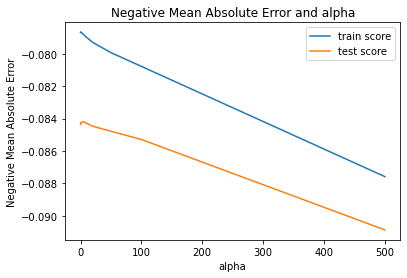

In [62]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=4.0)

In [64]:
# check the coefficient values with lambda = 4

alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02080649,  0.07207235,  0.04542395,  0.03304979,  0.04840876,
        0.01079683,  0.0108682 ,  0.09554072,  0.00974077,  0.01472411,
        0.02053536,  0.03697893,  0.01035411, -0.01286993, -0.02032679,
        0.01479401,  0.01140047,  0.01566339,  0.01835853,  0.01499049,
        0.01685277, -0.02061887,  0.01504006,  0.07149944,  0.02749908,
        0.11011057,  0.07845212,  0.02679679, -0.0101638 ,  0.02313197,
       -0.01509376, -0.00935736,  0.01766308, -0.00964437, -0.01611114,
        0.0126319 , -0.04100263, -0.03428237,  0.01091748, -0.01657849,
        0.03541344,  0.02187437,  0.01845924,  0.04224736,  0.01597315])

In [65]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013646655194396364

In [66]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0208
1,OverallQual,0.0721
2,OverallCond,0.0454
3,BsmtFinSF1,0.0330
4,TotalBsmtSF,0.0484
5,1stFlrSF,0.0108
6,2ndFlrSF,0.0109
7,GrLivArea,0.0955
8,BsmtFullBath,0.0097
9,HalfBath,0.0147


In [67]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0208,
 'OverallQual': 0.0721,
 'OverallCond': 0.0454,
 'BsmtFinSF1': 0.033,
 'TotalBsmtSF': 0.0484,
 '1stFlrSF': 0.0108,
 '2ndFlrSF': 0.0109,
 'GrLivArea': 0.0955,
 'BsmtFullBath': 0.0097,
 'HalfBath': 0.0147,
 'Fireplaces': 0.0205,
 'GarageCars': 0.037,
 'WoodDeckSF': 0.0104,
 'IsRemodell': -0.0129,
 'builtorremodelledage': -0.0203,
 'OldOrNewGarage': 0.0148,
 'd_BsmtQual': 0.0114,
 'd_BsmtExposure': 0.0157,
 'd_HeatingQC': 0.0184,
 'd_KitchenQual': 0.015,
 'd_GarageFinish': 0.0169,
 'd_BldgType': -0.0206,
 'd_SaleCondition': 0.015,
 'MSZoning_FV': 0.0715,
 'MSZoning_RH': 0.0275,
 'MSZoning_RL': 0.1101,
 'MSZoning_RM': 0.0785,
 'Neighborhood_Crawfor': 0.0268,
 'Neighborhood_Edwards': -0.0102,
 'Neighborhood_NridgHt': 0.0231,
 'Neighborhood_OldTown': -0.0151,
 'Neighborhood_SWISU': -0.0094,
 'Neighborhood_StoneBr': 0.0177,
 'Exterior1st_BrkComm': -0.0096,
 'Exterior1st_CemntBd': -0.0161,
 'Exterior1st_Stucco': 0.0126,
 'Exterior1st_VinylSd': -0.041,
 'Exterior1st_Wd Sdng'

In [68]:
# RFE

# Do an RFE to minimise the features to 10
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 10)            
rfe = rfe.fit(X_train_ridge, y_train)

In [69]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
8,MSZoning_RL,True,1,0.1101
4,GrLivArea,True,1,0.0955
0,OverallQual,True,1,0.0721
7,MSZoning_FV,True,1,0.0715
3,TotalBsmtSF,True,1,0.0484
1,OverallCond,True,1,0.0454
9,Foundation_PConc,True,1,0.0422
5,GarageCars,True,1,0.0370
2,BsmtFinSF1,True,1,0.0330
6,builtorremodelledage,True,1,-0.0203


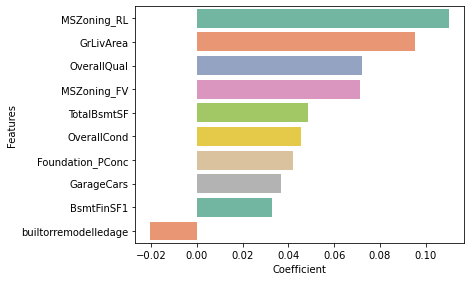

In [70]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()

In [76]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")

In [77]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [80]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coefficient']
res=paraRFE.sort_values(by=['Coefficient'], ascending = False)
res.head(20)

,Variable,Coefficient
0,constant,11.996
26,d_BsmtQual,0.110
8,BsmtUnfSF,0.096
27,d_BsmtExposure,0.078
2,LotFrontage,0.072
24,d_LotShape,0.071
5,OverallCond,0.048
3,LotArea,0.045
44,Neighborhood_BrDale,0.042
12,GrLivArea,0.037


In [81]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coefficient'] != 0)])
predRFE

,Variable,Coefficient
0,constant,11.996
1,MSSubClass,0.021
2,LotFrontage,0.072
3,LotArea,0.045
4,OverallQual,0.033
5,OverallCond,0.048
6,MasVnrArea,0.011
7,BsmtFinSF1,0.011
8,BsmtUnfSF,0.096
9,TotalBsmtSF,0.010


### Lasso

In [91]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1]}
# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.078746,-0.084296,1
2,0.0003,-0.078800,-0.084297,2
0,0.0001,-0.078694,-0.084312,3
3,0.0004,-0.078868,-0.084332,4
4,0.0005,-0.078974,-0.084454,5
5,0.001,-0.079528,-0.084974,6
6,0.002,-0.080382,-0.085604,7
7,0.003,-0.080829,-0.086025,8
8,0.004,-0.081231,-0.086323,9
9,0.005,-0.081725,-0.086665,10


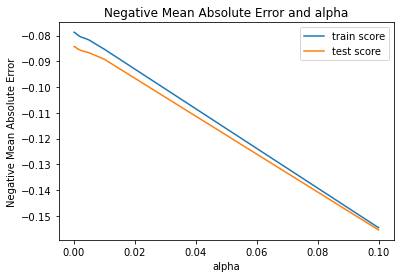

In [93]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [94]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [95]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02069328,  0.0723537 ,  0.0452147 ,  0.03317806,  0.04904685,
        0.0011152 , -0.        ,  0.10803764,  0.00934761,  0.01420427,
        0.02025767,  0.03741984,  0.01023077, -0.01238108, -0.02005249,
        0.01464007,  0.01095352,  0.01586161,  0.01808431,  0.01488653,
        0.01703476, -0.02048922,  0.01475653,  0.0769864 ,  0.0301353 ,
        0.12110839,  0.08761632,  0.02658695, -0.01009771,  0.02287122,
       -0.01529415, -0.00984596,  0.01735671, -0.00957843, -0.00480926,
        0.01331525, -0.03928557, -0.03375881,  0.        , -0.01723378,
        0.03363642,  0.02107652,  0.01781795,  0.04180466,  0.01556595])

In [96]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013622928660692247

In [97]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0207
1,OverallQual,0.0724
2,OverallCond,0.0452
3,BsmtFinSF1,0.0332
4,TotalBsmtSF,0.0490
5,1stFlrSF,0.0011
6,GrLivArea,0.1080
7,BsmtFullBath,0.0093
8,HalfBath,0.0142
9,Fireplaces,0.0203


In [98]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.020693278344909888,
 'OverallQual': 0.07235369708145721,
 'OverallCond': 0.04521470226429535,
 'BsmtFinSF1': 0.03317806239582206,
 'TotalBsmtSF': 0.04904685244490496,
 '1stFlrSF': 0.0011151951237057174,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.10803763916027476,
 'BsmtFullBath': 0.009347612427721272,
 'HalfBath': 0.014204273813494196,
 'Fireplaces': 0.020257669337865387,
 'GarageCars': 0.037419844797388926,
 'WoodDeckSF': 0.010230767552447569,
 'IsRemodell': -0.01238108110848613,
 'builtorremodelledage': -0.020052487045126993,
 'OldOrNewGarage': 0.014640071785477113,
 'd_BsmtQual': 0.010953517429247373,
 'd_BsmtExposure': 0.01586160518178236,
 'd_HeatingQC': 0.01808431456207364,
 'd_KitchenQual': 0.014886530790453406,
 'd_GarageFinish': 0.017034760773704503,
 'd_BldgType': -0.02048922399310159,
 'd_SaleCondition': 0.014756533213802896,
 'MSZoning_FV': 0.07698639515408184,
 'MSZoning_RH': 0.03013530017077582,
 'MSZoning_RL': 0.121108392140079,
 'MSZoning_RM': 0.08761632402438041

### Rfe

In [99]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm,n_features_to_select= 10)            
rfe = rfe.fit(X_train_lasso, y_train)

In [100]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
8,MSZoning_RL,True,1,0.121108
4,GrLivArea,True,1,0.108038
7,MSZoning_FV,True,1,0.076986
0,OverallQual,True,1,0.072354
3,TotalBsmtSF,True,1,0.049047
1,OverallCond,True,1,0.045215
9,Foundation_PConc,True,1,0.041805
5,GarageCars,True,1,0.037420
2,BsmtFinSF1,True,1,0.033178
6,builtorremodelledage,True,1,-0.020052


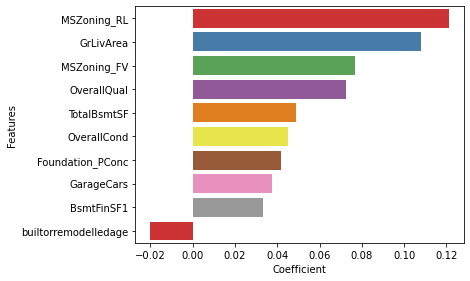

In [106]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph represent 10 variable for Lasso

In [102]:
# Lasso model parameters
model_parameters1 = list(lasso.coef_)
model_parameters1.insert(0, lasso.intercept_)
model_parameters1 = [round(x, 3) for x in model_parameters1]
cols = X.columns
cols = cols.insert(0, "constant")

In [103]:
# Create a dataframe for Lasso Coefficients
mod_ridge1 = list(zip(cols, model_parameters1))

In [104]:
paraRFE1 = pd.DataFrame(mod_ridge1)
paraRFE1.columns = ['Variable', 'Coefficient']
res1=paraRFE1.sort_values(by=['Coefficient'], ascending = False)
res1.head(20)

,Variable,Coefficient
0,constant,11.996
26,d_BsmtQual,0.121
8,BsmtUnfSF,0.108
27,d_BsmtExposure,0.088
24,d_LotShape,0.077
2,LotFrontage,0.072
5,OverallCond,0.049
3,LotArea,0.045
44,Neighborhood_BrDale,0.042
12,GrLivArea,0.037


In [105]:
## since there were few coefficients at 0, we removed them from features
predRFE1 = pd.DataFrame(paraRFE1[(paraRFE1['Coefficient'] != 0)])
predRFE1

,Variable,Coefficient
0,constant,11.996
1,MSSubClass,0.021
2,LotFrontage,0.072
3,LotArea,0.045
4,OverallQual,0.033
5,OverallCond,0.049
6,MasVnrArea,0.001
8,BsmtUnfSF,0.108
9,TotalBsmtSF,0.009
10,1stFlrSF,0.014


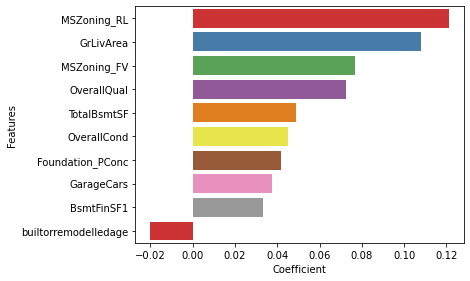

In [108]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

# Conclusion :
    
    Comparison of Both Ridge and Lasso regression values
    
    optimal value of Lambda Values:
        
        Ridge value: 4.0
        Lasso value: 0.0002
            
    
    mean squared error values:
        
        Ridge value: 0.013646655194396364
        Lasso Value: 0.013622928660692247
    
     
    By Comparing the mean squared error of Ridge and Lasso where Ridge value is 0.013646655194396364 and 
    Lasso Value is 0.013622928660692247. we can see that Lasso values are slightly lower than the Ridge value.
    
    Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), 
    Lasso has a better edge over Ridge.
    
    
    Hence based on Lasso, the factors that generally affect the price are the Zoning classification, 
    Living area square feet, Overall quality and condition of the finished house, Foundation type of the house, 
    Number of cars that can be accomodated in the garage, Total basement area in square feet
    and the Basement finished square feet area
    
    Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price       of a house with the equation below.
    
    The Equation :
        
        Log(Y) = C +  0.121 * (MSZoning_RL) + 0.108 * (GrLivArea) + 0.077 * (MSZoning_FV)+ 0.072 * (OverallQual)+ 
        0.049 * (TotalBsmtSF) + 0.045 * (OverallCond) + 0.042 * (Foundation_PConc) + 
        0.037 * (GarageCars) + 0.033 * (BsmtFinSF1) -0.02 * (builtorremodelledage) ++ Error term(RSS + alpha * (sum of               absolute value of coefficients)
        
    When the market value of the property is lower than the Predicted Sale Price, its the time to buy.

    